# Homework 1: Preprocessing and Text Classification

Student Name:Rongbing Shan

Student ID:945388

# General Info

<b>Due date</b>: Sunday, 5 Apr 2020 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -20% per day (both week and weekend days counted)

<b>Marks</b>: 10% of mark for class (with 9% on correctness + 1% on quality and efficiency of your code)

<b>Materials</b>: See [Using Jupyter Notebook and Python page](https://canvas.lms.unimelb.edu.au/courses/17601/pages/using-jupyter-notebook-and-python?module_item_id=1678430) on Canvas (under Modules>Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages NLTK, Numpy, Scipy, Matplotlib, Scikit-Learn, and Gensim. In particular, if you are not using a lab computer which already has it installed, we recommend installing all the data for NLTK, since you will need various parts of it to complete this assignment. You can also use any Python built-in packages, but do not use any other 3rd party packages (the packages listed above are all fine to use); if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

To familiarize yourself with NLTK, here is a free online book:  Steven Bird, Ewan Klein, and Edward Loper (2009). <a href=http://nltk.org/book>Natural Language Processing with Python</a>. O'Reilly Media Inc. You may also consult the <a href=https://www.nltk.org/api/nltk.html>NLTK API</a>.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 

You will be marked not only on the correctness of your methods, but also the quality and efficency of your code: in particular, you should be careful to use Python built-in functions and operators when appropriate and pick descriptive variable names that adhere to <a href="https://www.python.org/dev/peps/pep-0008/">Python style requirements</a>. If you think it might be unclear what you are doing, you should comment your code to help the marker make sense of it.

<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on the discussion board; we recommend you check it regularly.

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourge you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

# Overview

In this homework, you'll be working with a collection tweets. The task is to classify whether a tweet constitutes a rumour event. This homework involves writing code to preprocess data and perform text classification.

# 1. Preprocessing (5 marks)

**Instructions**: Run the code below to download the tweet corpus for the assignment. Note: the download may take some time. **No implementation is needed.**

In [1]:
import requests
import os
from pathlib import Path

fname = 'rumour-data.tgz'
data_dir = os.path.splitext(fname)[0] #'rumour-data'

my_file = Path(fname)
if not my_file.is_file():
    url = "https://github.com/jhlau/jhlau.github.io/blob/master/files/rumour-data.tgz?raw=true"
    r = requests.get(url)

    #Save to the current directory
    with open(fname, 'wb') as f:
        f.write(r.content)
        
print("Done. File downloaded:", my_file)


Done. File downloaded: rumour-data.tgz


**Instructions**: Run the code to extract the zip file. Note: the extraction may take a minute or two. **No implementation is needed.**

In [2]:
import tarfile

#decompress rumour-data.tgz
tar = tarfile.open(fname, "r:gz")
tar.extractall()
tar.close()

#remove superfluous files (e.g. .DS_store)
extra_files = []
for r, d, f in os.walk(data_dir):
    for file in f:
        if (file.startswith(".")):
            extra_files.append(os.path.join(r, file))
for f in extra_files:
    os.remove(f)

print("Extraction done.")

Extraction done.


### Question 1 (1.0 mark)

**Instructions**: The corpus data is in the *rumour-data* folder. It contains 2 sub-folders: *non-rumours* and *rumours*. As the names suggest, *rumours* contains all rumour-propagating tweets, while *non-rumours* has normal tweets. Within  *rumours* and *non-rumours*, you'll find some sub-folders, each named with an ID. Each of these IDs constitutes an 'event', where an event is defined as consisting a **source tweet** and its **reactions**.

An illustration of the folder structure is given below:

    rumour-data
        - rumours
            - 498254340310966273
                - reactions
                    - 498254340310966273.json
                    - 498260814487642112.json
                - source-tweet
                    - 498254340310966273.json
        - non-rumours

Now we need to gather the tweet messages for rumours and non-rumour events. As the individual tweets are stored in json format, we need to use a json parser to parse and collect the actual tweet message. The function `get_tweet_text_from_json(file_path)` is provided to do that.

**Task**: Complete the `get_events(event_dir)` function. The function should return **a list of events** for a particular class of tweets (e.g. rumours), and each event should contain the source tweet message and all reaction tweet messages.

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [3]:
import json

def get_tweet_text_from_json(file_path):
    with open(file_path) as json_file:
        data = json.load(json_file)
        return data["text"]
    
def get_events(event_dir):
    event_list = []
    for event in sorted(os.listdir(event_dir)):
        ###
        # Your answer BEGINS HERE
        ###
        data_list = []    # list of parsed tweets for an event
        
        #generate directory path for source-tweet and reactions 
        sourcetweet_path = os.path.join(event_dir,event,"source-tweet")
        reactions_path = os.path.join(event_dir,event,"reactions")

        #generate parsed tweets of source tweet for the event
        for file in os.listdir(sourcetweet_path):
            file_path = os.path.join(sourcetweet_path,file)
            data = get_tweet_text_from_json(file_path)
            data_list += [data]
        #generate parsed tweets of reactions for the event
        for file in os.listdir(reactions_path):
            file_path = os.path.join(reactions_path,file)
            data = get_tweet_text_from_json(file_path)
            data_list += [data]

        #each event consists of all parsed tweets from source-tweet and reactions
        event_list += [data_list]
        
        ###
        # Your answer ENDS HERE
        ###
        
    return event_list
    
#a list of events, and each event is a list of tweets (source tweet + reactions)    
rumour_events = get_events(os.path.join(data_dir, "rumours"))
nonrumour_events = get_events(os.path.join(data_dir, "non-rumours"))

print("Number of rumour events =", len(rumour_events))
print("Number of non-rumour events =", len(nonrumour_events))

Number of rumour events = 500
Number of non-rumour events = 1000


**For your testing:**

In [4]:
assert(len(rumour_events) == 500)
assert(len(nonrumour_events) == 1000)

### Question 2 (1.0 mark)

**Instructions**: Next we need to preprocess the collected tweets to create a bag-of-words representation. The preprocessing steps required here are: (1) tokenize each tweet into individual word tokens (using NLTK `TweetTokenizer`); and (2) remove stopwords (based on NLTK `stopwords`).

**Task**: Complete the `preprocess_events(event)` function. The function takes **a list of events** as input, and returns **a list of preprocessed events**. Each preprocessed event should have a dictionary of words and frequencies.

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [5]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from collections import defaultdict

tt = TweetTokenizer()
stopwords = set(stopwords.words('english'))

def preprocess_events(events):
    ###
    # Your answer BEGINS HERE
    ###
    procd_events = []
    for event in events:
        bow = {}    #bag of words
        
        for tweet in event:
            tokens = tt.tokenize(tweet)
            
            # calculate frequencies for tokens and remove stop words
            for token in tokens:
                if token.lower() not in stopwords:
                    if token not in bow.keys():
                        bow[token] = 1
                    else:
                        bow[token] += 1
        procd_events += [bow]
    
    return procd_events
    ###
    # Your answer ENDS HERE
    ###

preprocessed_rumour_events = preprocess_events(rumour_events)
preprocessed_nonrumour_events = preprocess_events(nonrumour_events)

print("Number of preprocessed rumour events =", len(preprocessed_rumour_events))
print("Number of preprocessed non-rumour events =", len(preprocessed_nonrumour_events))

Number of preprocessed rumour events = 500
Number of preprocessed non-rumour events = 1000


**For your testing**:

In [6]:
assert(len(preprocessed_rumour_events) == 500)
assert(len(preprocessed_nonrumour_events) == 1000)

**Instructions**: Hashtags (i.e. topic tags which start with #) pose an interesting tokenisation problem because they often include multiple words written without spaces or capitalization. Run the code below to collect all unique hashtags in the preprocessed data. **No implementation is needed.**



In [7]:
def get_all_hashtags(events):
    hashtags = set([])
    for event in events:
        for word, frequency in event.items():
            if word.startswith("#"):
                hashtags.add(word)
    return hashtags

hashtags = get_all_hashtags(preprocessed_rumour_events + preprocessed_nonrumour_events)
print("Number of hashtags =", len(hashtags))

Number of hashtags = 1829


### Question 3 (2.0 mark)

**Instructions**: Our task here to tokenize the hashtags, by implementing a reversed version of the MaxMatch algorithm discussed in class, where matching begins at the end of the hashtag and progresses backwards. NLTK has a list of words that you can use for matching, see starter code below. Be careful about efficiency with respect to doing word lookups. One extra challenge you have to deal with is that the provided list of words includes only lemmas: your MaxMatch algorithm should match inflected forms by converting them into lemmas using the NLTK lemmatizer before matching. When lemmatising a word, you also need to provide the part-of-speech tag of the word. You should use `nltk.tag.pos_tag` for doing part-of-speech tagging.

Note that the list of words is incomplete, and, if you are unable to make any longer match, your code should default to matching a single letter. Create a new list of tokenized hashtags (this should be a list of lists of strings) and use slicing to print out the last 20 hashtags in the list.

For example, given "#speakup", the algorithm should produce: \["#", "speak", "up"\]. And note that you do not need to delete the hashtag symbol ("#") from the tokenised outputs.

**Task**: Complete the `tokenize_hashtags(hashtags)` function by implementing a reversed MaxMatch algorithm. The function takes as input **a set of hashtags**, and returns **a dictionary** where key="hashtag" and value="a list of word tokens".

**Check**: Use the assertion statements in *"For your testing"* below for the expected output.

In [8]:
from nltk.corpus import wordnet
from nltk.tag import pos_tag

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
words_init = set(nltk.corpus.words.words()) #a list of words provided by NLTK

# convert the words to lower cases
words = set()
for text in words_init:
    words.add(text.lower())
    
def get_wordnet_pos(word):
    # get the pos tag for wordnet from nltk.tag.pos_tag, given an input word
    # the conversion is based on the first letter from nltk tags
    tagHead = pos_tag([word])[0][1][0]
    if tagHead == 'N':
        return wordnet.NOUN
    elif tagHead == "J": 
        return wordnet.ADJ
    elif tagHead == 'V':
        return wordnet.VERB
    elif tagHead == 'R':
        return wordnet.ADV
    else:
        return wordnet.NOUN

def reverse_maxmatch(word):
    # tokenize the input hashtag using reverse MaxMatch algorithm
    # note that the input hashtag should start with "#"
    if word == "#":
        return ["#"]
    wordlength = len(word)
    end = wordlength
    for start in range(0, end):
        subword = word[start:end]
        if lemmatizer.lemmatize(subword.lower(),get_wordnet_pos(subword)) in words:
            return reverse_maxmatch(word[0:start]) + [subword]
    return reverse_maxmatch(word[0:-1]) + [word[-1]]

def tokenize_hashtags(hashtags):
    ###
    # Your answer BEGINS HERE
    ###
    hashtag_dict = {}
    for hashtag in hashtags:
        hashtag_dict[hashtag] = reverse_maxmatch(hashtag)
    return hashtag_dict
    ###
    # Your answer ENDS HERE
    ###


tokenized_hashtags = tokenize_hashtags(hashtags)

print(list(tokenized_hashtags.items())[:20])

[('#chokenchickens', ['#', 'cho', 'ken', 'chickens']), ('#StaySafeMalala', ['#', 'Stay', 'Sa', 'f', 'eM', 'alala']), ('#KSLAM', ['#', 'K', 'SLAM']), ('#SMH', ['#', 'S', 'M', 'H']), ('#трагедия', ['#', 'т', 'р', 'а', 'г', 'е', 'д', 'и', 'я']), ('#20', ['#', '2', '0']), ('#NotParadise', ['#', 'Not', 'Paradise']), ('#parisisburning', ['#', 'parisis', 'burning']), ('#4U9529', ['#', '4', 'U', '9', '5', '2', '9']), ('#promise', ['#', 'promise']), ('#ABCNews24', ['#', 'AB', 'C', 'News', '2', '4']), ('#khilafah', ['#', 'khila', 'f', 'ah']), ('#foodforthought', ['#', 'food', 'for', 'thought']), ('#freedom', ['#', 'freedom']), ('#PrioritiesMessedUp', ['#', 'Priorities', 'Messe', 'dUp']), ('#Proudcanadian', ['#', 'P', 'roud', 'canadian']), ('#muslims', ['#', 'mus', 'li', 'ms']), ('#CharlieHebdo', ['#', 'Charlie', 'He', 'b', 'do']), ('#CopsSUCK', ['#', 'Cops', 'SUCK']), ('#MiraclesDoHappen', ['#', 'Miracles', 'Do', 'Happen'])]


**For your testing:**

In [9]:
assert(len(tokenized_hashtags) == len(hashtags))

### Question 4 (1.0 mark)

**Instructions**: Now that we have the tokenized hashtags, we need to go back and update the bag-of-words representation for each event.

**Task**: Complete the ``update_event_bow(events)`` function. The function takes **a list of preprocessed events**, and for each event, it looks for every hashtag it has and updates the bag-of-words dictionary with the tokenized hashtag tokens. Note: you do not need to delete the counts of the original hashtags when updating the bag-of-words (e.g., if a document has "#speakup":2 in its bag-of-words representation, you do not need to delete this hashtag and its counts).

In [10]:
def update_event_bow(events):
    ###
    # Your answer BEGINS HERE
    ###

    for event in events:
        #find all hashtags in an event and put them in a list for further process
        hashtags = []
        for token in event.keys():
            if token.startswith("#"):
                hashtags = hashtags + [token]
        #loop through all hashtags, update event with tokenized hashtag tokens
        for hashtag in hashtags:
            if hashtag in tokenized_hashtags:
                for word in tokenized_hashtags[hashtag]:
                    if word not in event:
                        event[hashtag] = 1
                    else:
                        event[hashtag] += 1
    ###
    # Your answer ENDS HERE
    ###
    
update_event_bow(preprocessed_rumour_events)
update_event_bow(preprocessed_nonrumour_events)

print("Number of preprocessed rumour events =", len(preprocessed_rumour_events))
print("Number of preprocessed non-rumour events =", len(preprocessed_nonrumour_events))

Number of preprocessed rumour events = 500
Number of preprocessed non-rumour events = 1000


# Text Classification (4 marks)

### Question 5 (1.0 mark)

**Instructions**: Here we are interested to do text classification, to predict, given a tweet and its reactions, whether it is a rumour or not. The task here is to create training, development and test partitions from the preprocessed events and convert the bag-of-words representation into feature vectors.

**Task**: Using scikit-learn, create training, development and test partitions with a 60%/20%/20% ratio. Remember to preserve the ratio of rumour/non-rumour events for all your partitions. Next, turn the bag-of-words dictionary of each event into a feature vector, using scikit-learn `DictVectorizer`.

In [11]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

vectorizer = DictVectorizer()

###
# Your answer BEGINS HERE
###
randomState = 50
# create labels for both datasets, rumour and nonrumour
rumour_lables = [True] * len(preprocessed_rumour_events)
nonrumour_lables = [False] * len(preprocessed_nonrumour_events)
lables = rumour_lables + nonrumour_lables
dataset = preprocessed_rumour_events + preprocessed_nonrumour_events

#create training, development and test partitions with a 60%/20%/20% ratio
##fist, split the test data set with proportion 20%
remain, test, remain_label, test_label = \
train_test_split(dataset, lables, test_size=0.2, stratify=lables, random_state=randomState)

##then, data remainded is split into train and test with propotion 3:1 which is 25%
train, development, train_label, development_label = \
train_test_split(remain, remain_label, test_size=0.25, stratify=remain_label, random_state=randomState)

#verify the ratio of rumour/non-rumour preserve in all partitions
def getRumourRatio(data):
    # function to return teh rumour/non-rumour ratio given a label dataset
    rumourCount = 0
    for n in data:
        if n:
            rumourCount += 1
    nonrumourCount = (len(data) - rumourCount) * 1.0
    return rumourCount / nonrumourCount
init_ratio = len(rumour_events)*1.0 / len(nonrumour_events)
assert(getRumourRatio(train_label)==init_ratio and getRumourRatio(development_label)==init_ratio \
       and getRumourRatio(test_label)==init_ratio)

#turn BOW into feature vector
train_data = vectorizer.fit_transform(train)
development_data = vectorizer.transform(development)
test_data = vectorizer.transform(test)

###
# Your answer ENDS HERE
###

print("Vocabulary size =", len(vectorizer.vocabulary_))

Vocabulary size = 26698


### Question 6 (2.0 mark)

**Instructions**: Now, let's build some classifiers. Here, we'll be comparing Naive Bayes and Logistic Regression. For each, you need to first find a good value for their main regularisation (hyper)parameters, which you should identify using the scikit-learn docs or other resources. Use the development set you created for this tuning process; do **not** use cross-validation in the training set, or involve the test set in any way. You don't need to show all your work, but you do need to print out the accuracy with enough different settings to strongly suggest you have found an optimal or near-optimal choice. We should not need to look at your code to interpret the output.

**Task**: Implement two text classifiers: Naive Bayes and Logistic Regression. Tune the hyper-parameters of these classifiers and print the task performance for different hyper-parameter settings.

*** MNB Hyper-parameter Tunning ***
Grid Range: [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]
Accuracies:[0.8133333333333334, 0.8133333333333334, 0.8166666666666667, 0.82, 0.8066666666666666, 0.8133333333333334, 0.81, 0.81, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.8066666666666666, 0.81, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8133333333333334, 0.8233333333333334, 0.8233333333333334, 0.82, 0.82, 0.82, 0.82, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8233333333333334, 0.8266666666666667, 0.8266666666666667, 0.83, 0.83, 0.83, 0.83, 0.82333333333

Text(0, 0.5, 'Accuracy')

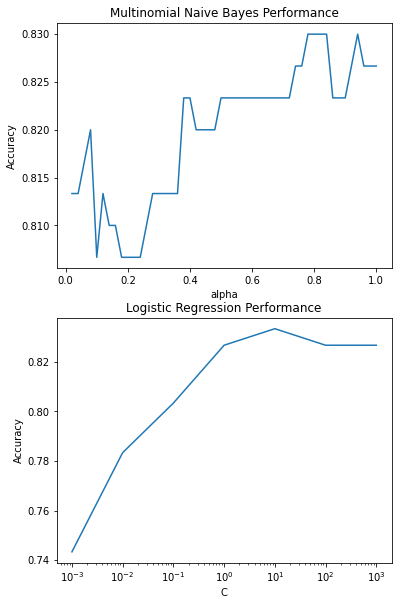

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

###
# Your answer BEGINS HERE
###

#Naive Bayes classifier
##performing grid search over parameter alpha of MultinomialNB
#alpha_range = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0]
alpha_range = np.linspace(0.02,1,num=50)
MNB_accuracy = []    # list to store alpha value with accuracy scores 
for a in alpha_range:
    clfNB = MultinomialNB(alpha = a)
    clfNB.fit(train_data, train_label)
    MNBpredictions = clfNB.predict(development_data)
    MNB_accuracy += [accuracy_score(development_label, MNBpredictions)]
print("*** MNB Hyper-parameter Tunning ***")
print(f'Grid Range: {alpha_range}')
print(f'Accuracies:{MNB_accuracy}')
##find best performance hyperparameter
MNB_best_accuracy = max(MNB_accuracy)
MNB_best_alpha = alpha_range[MNB_accuracy.index(MNB_best_accuracy)]
print(f'Best performance is given at alpha({MNB_best_alpha}) with accuracy({MNB_best_accuracy:.2f})')
print("\n--------------------------------------------------\n")

# Logistic Regression classifier
##performing grid search over parameter C of MultinomialNB
"""
For small values of C, we increase the regularization strength 
which will create simple models which underfit the data. 
For big values of C, we low the power of regularization 
which imples the model is allowed to increase it's complexity, 
and therefore, overfit the data.
"""
LR_accuracy = []
#C_range = [0.001,0.01,0.1,1,10,100, 1000]
C_range = np.logspace(-3,3,num=7)
for c in C_range:
    clfLR = LogisticRegression(C=c,solver = "liblinear")
    clfLR.fit(train_data,train_label)
    LRpredictions = clfLR.predict(development_data)
    LR_accuracy += [accuracy_score(development_label, LRpredictions)]
print("*** LR Hyper-parameter Tunning ***")
print(f'Grid Range: {C_range}')
print(f'Accuracies:{LR_accuracy}')
##find best performance hyperparameter
LR_best_accuracy = max(LR_accuracy)
LR_best_C = C_range[LR_accuracy.index(LR_best_accuracy)]

print(f'Best performance is given at C({LR_best_C}) with accuracy({LR_best_accuracy:.2f})')


# visualize the results
print("*" * 40)
print("Visualized results")
## MNB
plt.subplot(2, 1, 1)
plt.plot(alpha_range, MNB_accuracy)
plt.title('Multinomial Naive Bayes Performance')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
## LR
plt.subplot(2, 1, 2)
plt.subplots_adjust(top=2)
plt.xscale('log')
plt.plot(C_range, LR_accuracy)
plt.title('Logistic Regression Performance')
plt.xlabel('C')
plt.ylabel('Accuracy')

###
# Your answer ENDS HERE
###

### Question 7 (1.0 mark)

**Instructions**: Using the best settings you have found, compare the two classifiers based on performance in the test set. Print out both accuracy and macro-averaged F-score for each classifier. Be sure to label your output.

**Task**: Compute test performance in terms of accuracy and macro-averaged F-score for both Naive Bayes and Logistic Regression, using optimal hyper-parameter settings.

In [15]:
###
# Your answer BEGINS HERE
###
from sklearn.metrics import classification_report

def print_result(clf, predictions, classifications):
    # function to print out the accuracy and F-score for classifiers
    print (clf)
    print ("accuracy")
    print (accuracy_score(classifications,predictions))
    print (classification_report(classifications,predictions))

# use hyper-parameters found in Q6 to retrain the model
##MNB
clfMNB = MultinomialNB(alpha = MNB_best_alpha)
clfMNB.fit(train_data, train_label)
MNBpredictions = clfMNB.predict(test_data)
##LR
clfLR = LogisticRegression(C=LR_best_C,solver = "liblinear")
clfLR.fit(train_data,train_label)
LRpredictions = clfLR.predict(test_data)

#print out results
print("optimal Multinomial Naive Bayes:")
print_result(clfMNB, MNBpredictions, test_label)
print("\n--------------------------------------------------\n")
print("optimal Logistic Regression:")
print_result(clfLR, LRpredictions, test_label)

#print aditional information
print("**True means rumour, False means non-rumou")

###
# Your answer ENDS HERE
###

optimal Multinomial Naive Bayes:
MultinomialNB(alpha=0.78, class_prior=None, fit_prior=True)
accuracy
0.8233333333333334
              precision    recall  f1-score   support

       False       0.86      0.89      0.87       200
        True       0.75      0.70      0.73       100

    accuracy                           0.82       300
   macro avg       0.80      0.79      0.80       300
weighted avg       0.82      0.82      0.82       300


--------------------------------------------------

optimal Logistic Regression:
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy
0.8133333333333334
              precision    recall  f1-score   support

       False       0.81      0.94      0.87       200
  